In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
file_path ='/content/SampleSuperstore.csv'

In [3]:
df = pd.read_csv(file_path)

In [5]:
print(df.head())

        Ship Mode    Segment        Country             City       State  \
0    Second Class   Consumer  United States        Henderson    Kentucky   
1    Second Class   Consumer  United States        Henderson    Kentucky   
2    Second Class  Corporate  United States      Los Angeles  California   
3  Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4  Standard Class   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region         Category Sub-Category     Sales  Quantity  \
0        42420  South        Furniture    Bookcases  261.9600         2   
1        42420  South        Furniture       Chairs  731.9400         3   
2        90036   West  Office Supplies       Labels   14.6200         2   
3        33311  South        Furniture       Tables  957.5775         5   
4        33311  South  Office Supplies      Storage   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.871

In [7]:
print(df.tail())

           Ship Mode   Segment        Country         City       State  \
9989    Second Class  Consumer  United States        Miami     Florida   
9990  Standard Class  Consumer  United States   Costa Mesa  California   
9991  Standard Class  Consumer  United States   Costa Mesa  California   
9992  Standard Class  Consumer  United States   Costa Mesa  California   
9993    Second Class  Consumer  United States  Westminster  California   

      Postal Code Region         Category Sub-Category    Sales  Quantity  \
9989        33180  South        Furniture  Furnishings   25.248         3   
9990        92627   West        Furniture  Furnishings   91.960         2   
9991        92627   West       Technology       Phones  258.576         2   
9992        92627   West  Office Supplies        Paper   29.600         4   
9993        92683   West  Office Supplies   Appliances  243.160         2   

      Discount   Profit  
9989       0.2   4.1028  
9990       0.0  15.6332  
9991       0.2

In [8]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [10]:
df.drop_duplicates(inplace=True)

In [13]:
print("Summary Statistics:\n", df.describe())

Summary Statistics:
         Postal Code         Sales     Quantity     Discount      Profit
count   9977.000000   9977.000000  9977.000000  9977.000000  9977.00000
mean   55154.964117    230.148902     3.790719     0.156278    28.69013
std    32058.266816    623.721409     2.226657     0.206455   234.45784
min     1040.000000      0.444000     1.000000     0.000000 -6599.97800
25%    23223.000000     17.300000     2.000000     0.000000     1.72620
50%    55901.000000     54.816000     3.000000     0.200000     8.67100
75%    90008.000000    209.970000     5.000000     0.200000    29.37200
max    99301.000000  22638.480000    14.000000     0.800000  8399.97600


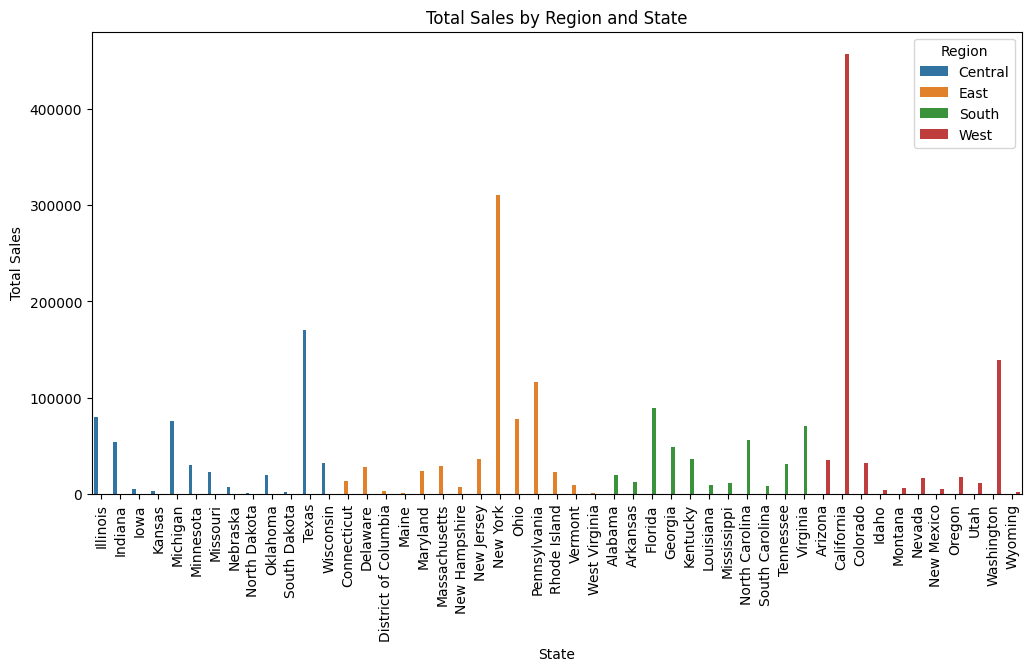

In [23]:
sales_by_region_state = df.groupby(['Region', 'State'])['Sales'].sum().reset_index()

# Plot the total sales by region and state using a bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='State', y='Sales', hue='Region', data=sales_by_region_state)
plt.title('Total Sales by Region and State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.legend(title='Region', loc='upper right')
plt.show()

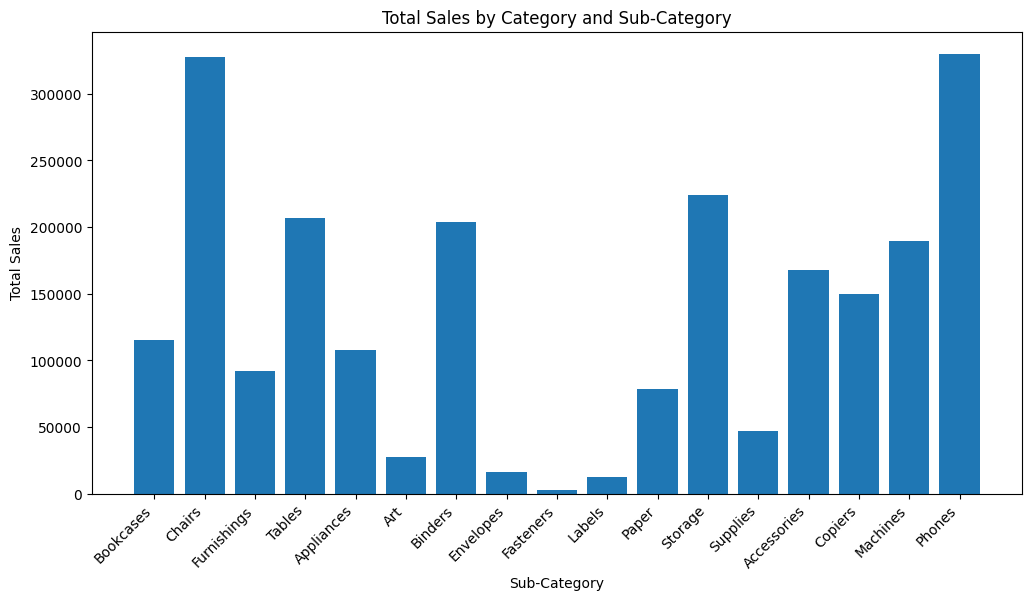

In [24]:
sales_by_category_subcategory = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

# Plot the total sales by category and sub-category using a bar graph
plt.figure(figsize=(12, 6))
plt.bar(sales_by_category_subcategory['Sub-Category'], sales_by_category_subcategory['Sales'])
plt.title('Total Sales by Category and Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.show()

     Region       State      Profit
39     West  California  76381.3871
21     East    New York  74038.5486
47     West  Washington  33402.6517
4   Central    Michigan  24463.1876
37    South    Virginia  18597.9504
1   Central     Indiana  18382.9363
30    South     Georgia  16250.0433
31    South    Kentucky  11199.6966
5   Central   Minnesota  10823.1874
14     East    Delaware   9977.3748


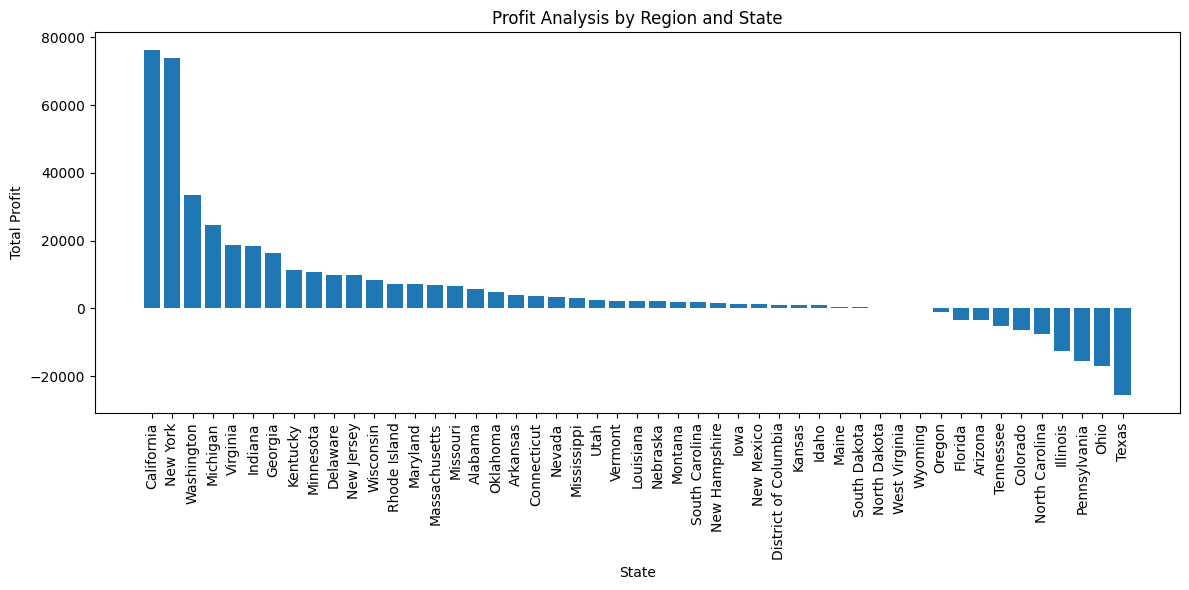

In [35]:
profit_by_region_state = df.groupby(['Region', 'State'])['Profit'].sum().reset_index()

# Sorting the data by total profit in descending order
profit_by_region_state = profit_by_region_state.sort_values(by='Profit', ascending=False)

# Displaying the top 10 profitable states
print(profit_by_region_state.head(10))

# Visualizing the profit by region and state using a bar chart
plt.figure(figsize=(12, 6))
plt.bar(profit_by_region_state['State'], profit_by_region_state['Profit'])
plt.xlabel('State')
plt.ylabel('Total Profit')
plt.title('Profit Analysis by Region and State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

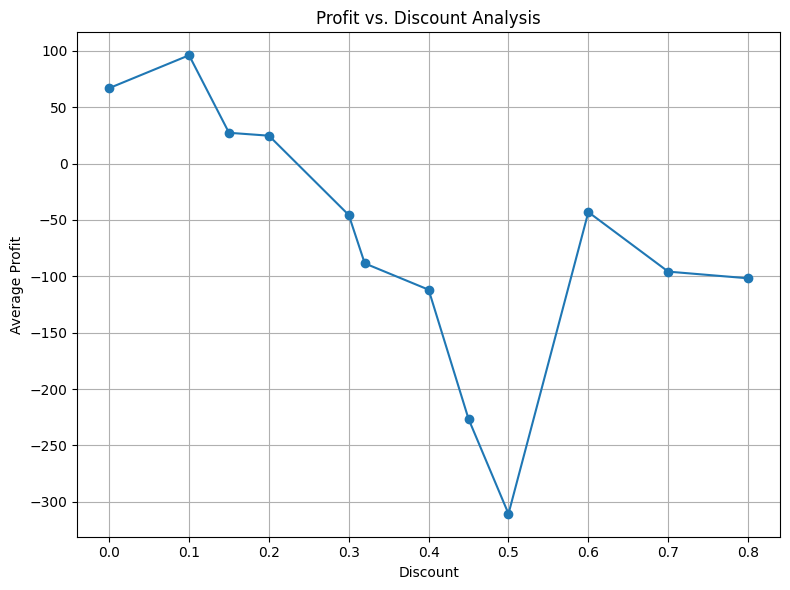

In [36]:
# Calculate the average profit for each discount value
profit_by_discount = df.groupby('Discount')['Profit'].mean().reset_index()

# Visualizing the profit vs. discount using a line plot
plt.figure(figsize=(8, 6))
plt.plot(profit_by_discount['Discount'], profit_by_discount['Profit'], marker='o', linestyle='-')
plt.xlabel('Discount')
plt.ylabel('Average Profit')
plt.title('Profit vs. Discount Analysis')
plt.grid(True)
plt.tight_layout()
plt.show()

     Region                 State      Profit
39     West            California  76381.3871
21     East              New York  74038.5486
47     West            Washington  33402.6517
4   Central              Michigan  24463.1876
37    South              Virginia  18597.9504
1   Central               Indiana  18382.9363
30    South               Georgia  16250.0433
31    South              Kentucky  11199.6966
5   Central             Minnesota  10823.1874
14     East              Delaware   9977.3748
20     East            New Jersey   9772.9138
12  Central             Wisconsin   8401.8004
24     East          Rhode Island   7285.6293
17     East              Maryland   7031.1788
18     East         Massachusetts   6785.5016
6   Central              Missouri   6436.2105
27    South               Alabama   5786.8253
9   Central              Oklahoma   4853.9560
28    South              Arkansas   4008.6871
13     East           Connecticut   3511.4918
43     West                Nevada 

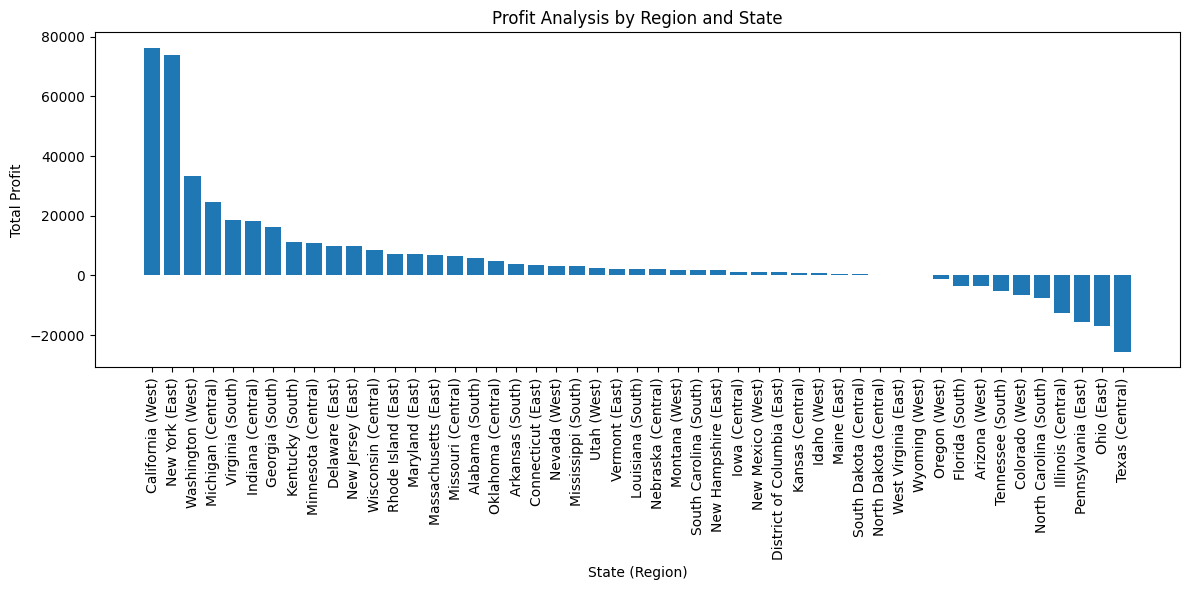

In [41]:
profit_by_region_state = df.groupby(['Region', 'State'])['Profit'].sum().reset_index()

# Sorting the data by total profit in descending order
profit_by_region_state = profit_by_region_state.sort_values(by='Profit', ascending=False)

# Displaying the profit by region and state
print(profit_by_region_state)

# You can also visualize the profit by region and state using a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(profit_by_region_state['State'] + ' (' + profit_by_region_state['Region'] + ')', profit_by_region_state['Profit'])
plt.xlabel('State (Region)')
plt.ylabel('Total Profit')
plt.title('Profit Analysis by Region and State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

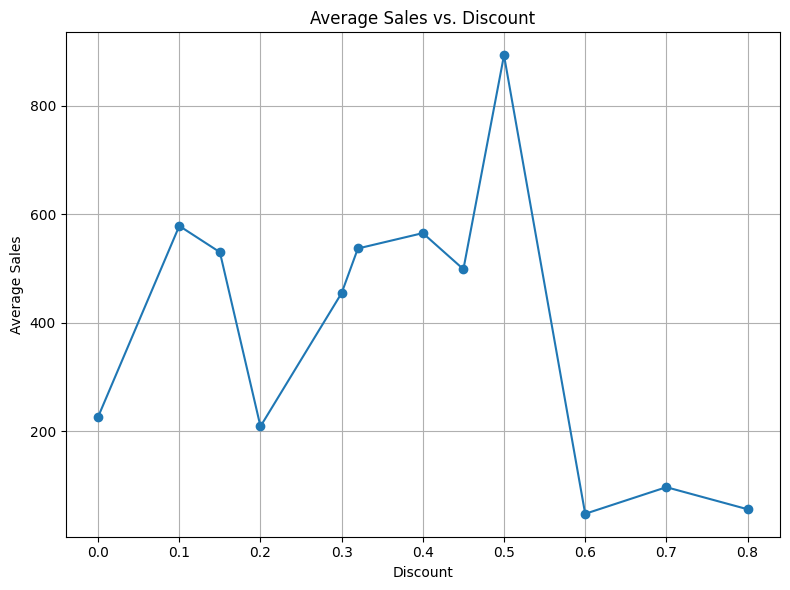

In [44]:
avg_sales_by_discount = df.groupby('Discount')['Sales'].mean().reset_index()

# Create a line plot
plt.figure(figsize=(8, 6))
plt.plot(avg_sales_by_discount['Discount'], avg_sales_by_discount['Sales'], marker='o', linestyle='-')
plt.xlabel('Discount')
plt.ylabel('Average Sales')
plt.title('Average Sales vs. Discount')
plt.grid(True)
plt.tight_layout()
plt.show()

In [45]:
top_profitable_states = profit_by_region_state.sort_values(by='Profit', ascending=False)

# Displaying the top 10 profitable states
top_10_states = top_profitable_states.head(10)
print(top_10_states)

     Region       State      Profit
39     West  California  76381.3871
21     East    New York  74038.5486
47     West  Washington  33402.6517
4   Central    Michigan  24463.1876
37    South    Virginia  18597.9504
1   Central     Indiana  18382.9363
30    South     Georgia  16250.0433
31    South    Kentucky  11199.6966
5   Central   Minnesota  10823.1874
14     East    Delaware   9977.3748


In [46]:
lowest_profit_states = profit_by_region_state.sort_values(by='Profit', ascending=True)

# Displaying the bottom 10 states with the lowest profits
bottom_10_states = lowest_profit_states.head(10)
print(bottom_10_states)

     Region           State      Profit
11  Central           Texas -25729.3563
22     East            Ohio -16971.3766
23     East    Pennsylvania -15559.9603
0   Central        Illinois -12607.8870
34    South  North Carolina  -7490.9122
40     West        Colorado  -6527.8579
36    South       Tennessee  -5341.6936
38     West         Arizona  -3427.9246
29    South         Florida  -3399.3017
45     West          Oregon  -1190.4705


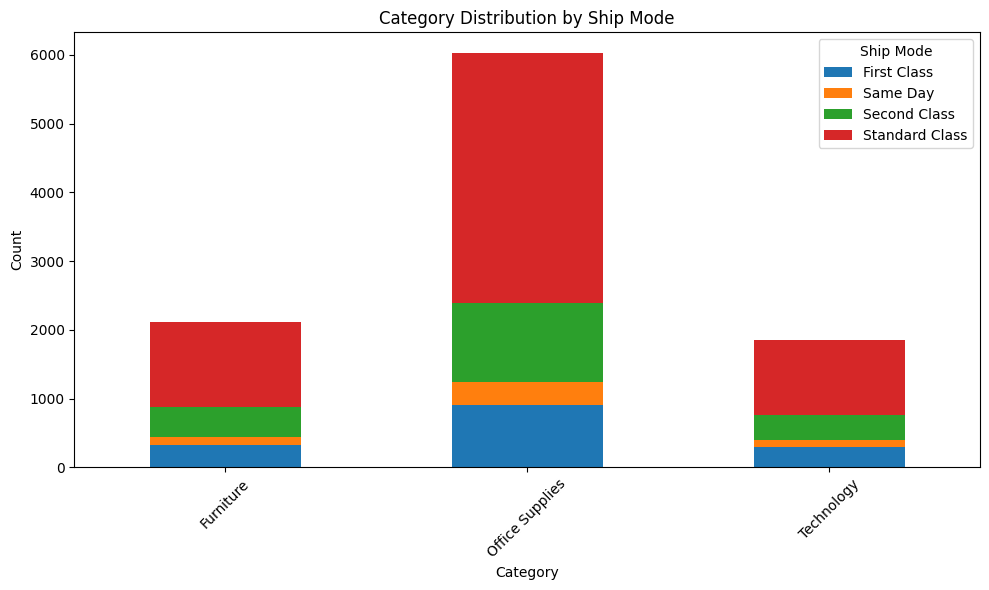

In [47]:
cross_tab = pd.crosstab(df['Category'], df['Ship Mode'])

# Plotting the stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Category Distribution by Ship Mode')
plt.xticks(rotation=45)
plt.legend(title='Ship Mode', loc='upper right')
plt.tight_layout()
plt.show()

<Figure size 1500x600 with 0 Axes>

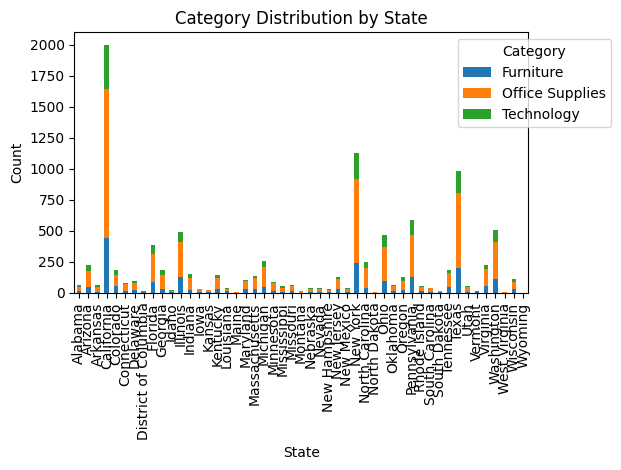

In [52]:
cross_tab = pd.crosstab(df['State'], df['Category'])

# Plotting the stacked bar chart
plt.figure(figsize=(15, 6))
ax = cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Category Distribution by State')
plt.xticks(rotation=90)
plt.legend(title='Category', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()

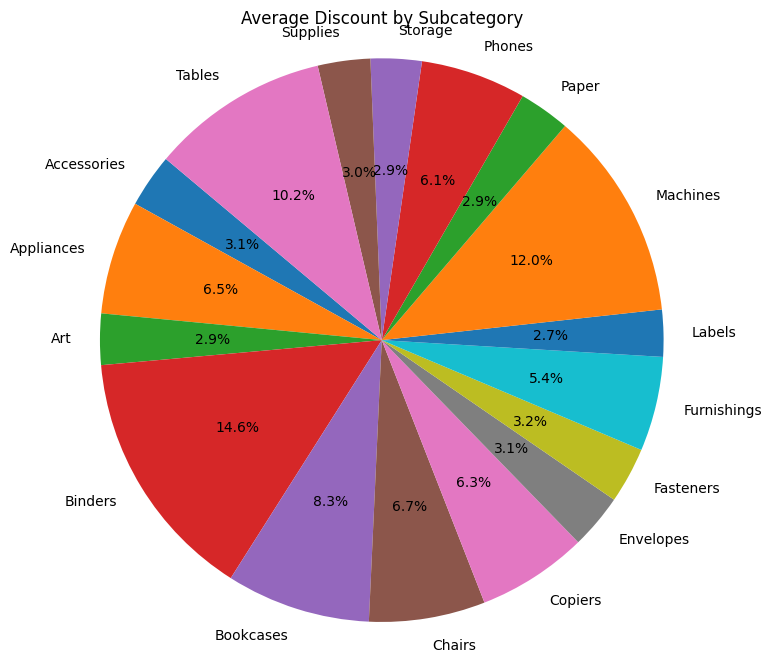

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have loaded the data into a DataFrame called 'df'
# If not, you can load the data using: df = pd.read_csv('path_to_your_data_file.csv')

# Grouping the data by 'Sub-Category' and calculating average discount for each subcategory
discount_by_subcategory = df.groupby('Sub-Category')['Discount'].mean()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(discount_by_subcategory, labels=discount_by_subcategory.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Average Discount by Subcategory')
plt.show()